Loading required package: usethis

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




[1] "Entering Register Model"
[1] "Creating model"
[1] "Creating version"
[1] "Model Registered"
[1] "Creating tar"
[1] "/tmp/RtmpPNesi1/model.rds"
[1] "Saving models"
[1] "Creating Tar"
[1] "Build time metrics"


Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Warning message in plot.window(xlim, ylim, log, ...):
“"top" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"top" is not a graphical parameter”
Warning message in title(xlab = xlab, ylab = ylab, ...):
“"top" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"top" is not a graphical parameter”


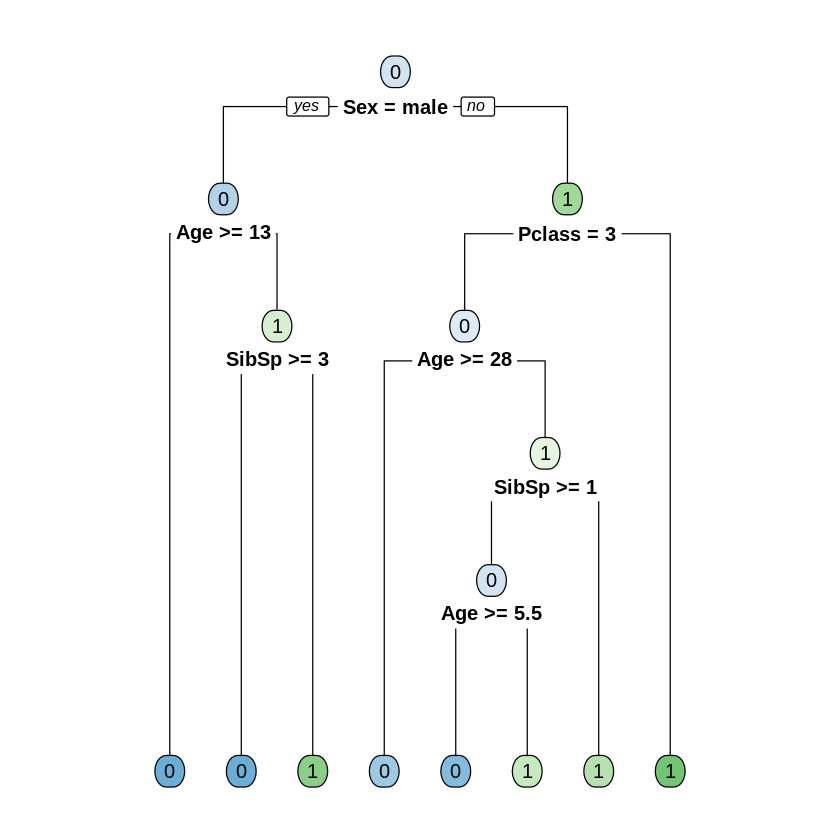

In [6]:
data.frame=read.csv('/data/train.csv',na.strings = '')
library(dplyr)
data.frame = select(data.frame, Survived, Pclass, Age, Sex, SibSp, Parch)

data.frame = na.omit(data.frame)
data.frame$Survived = factor(data.frame$Survived)
data.frame$Pclass = factor(data.frame$Pclass, order=TRUE, levels = c(3, 2, 1))


#split dataset
library(caTools)
set.seed(3000)
spl = sample.split(data.frame$Survived, SplitRatio = 0.7)
Train = subset(data.frame, spl==TRUE)
Test = subset(data.frame, spl==FALSE)
library(rpart)
library("rpart.plot")
fit = rpart(Survived~., data = Train, method = 'class')
rpart.plot(fit, extra = 0)

predicted = predict(fit, Test, type = 'class')
table = table(Test$Survived, predicted)
y_true = Test$Survived
y_pred = predicted

library(mosaicrml)
#library(mosaicml)

# Make predictions
#PredictForest = predict(StevensForest, newdata = Test)

# Make predictions
score <- function(fit, request_path){
  stevens <- read.csv(request_path)
  stevens = select(stevens, Survived, Pclass, Age, Sex, SibSp, Parch)
  stevens$Survived = factor(stevens$Survived)
  stevens$Pclass = factor(stevens$Pclass, order=TRUE, levels = c(3, 2, 1))
  
  #bet <- read.table(request_path)
  PredictForest <- predict(fit, newdata = stevens)
  return (toJSON(PredictForest))
}
library(reticulate)
library(devtools)
library(randomForest)
library(rjson)


help(fit)
help(predict_proba)
predict_prob <- predict(fit, Test, type="prob")


value <- register_model(
  fit,
  score,
  name="TitanicdatataTest",
  description="R Model",
  flavour="r",
  input_type="file",
  y_true=y_true,
  y_pred=y_pred,
  prob=predict_prob,
  labels=list("survived","not-survived"),
  model_type="classification",
  )


In [2]:
install.packages('caTools')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
install.packages('rpart.plot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
install.packages('reticulate')

also installing the dependency ‘png’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
install.packages('rjson')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

